# Predictive Model - Hotel Data set
Data set is from a previous Kaggle Challenge 
https://www.kaggle.com/jessemostipak/hotel-booking-demand

The primary objective of this data set is to predict whether someone will book a room or not. 

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas_profiling
from pandas_profiling import ProfileReport

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, validation_curve # k-fold CV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # Hyperparameter tuning


from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, plot_confusion_matrix, plot_roc_curve
# from category_encoders import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance # For interpretability

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
!pip install pandas-profiling[notebook,html];

In [3]:
DATA_SET = 'hotel_bookings.csv'
# DATA_PATH = 'C:\Users\bhavertz\OneDrive - alcsolutions.com\Documents\Python Scripts' 
ex = pd.read_csv(DATA_SET)
print(ex.shape)
ex.head()
ex.value_counts('market_segment')

(119390, 32)


market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
dtype: int64

# Wrangle Function

I deleted a lot of columns in my next wrangle function after my exploratory analysis to allow the cells in my explaratory analysis to run

In [58]:
def wrangle(filepath):
  

  # read file path and set date as index column 
  df = pd.read_csv(filepath, parse_dates=['reservation_status_date'],index_col = 'reservation_status_date').sort_index()

  # drop rows with many NaN values
  # df.drop(columns = ['agent','company', 'company'], inplace = True, axis = 1)

  # # drop all object columns 
  # df.drop(columns = ['arrival_date_month','meal','country','market_segment','reserved_room_type','assigned_room_type','deposit_type','customer_type'], inplace = True)

  # drop rows with high cardinality 
  cols_to_drop = []
  for col in df.select_dtypes('object').columns:
    if df[col].nunique() > 200:
      cols_to_drop.append(col)
  
  df = df.drop(columns =cols_to_drop)


  # drop any outlier
  df = df[(df['adr']<= 450) & (df['adr']>0)]
 
  

  # target column 
  # we need to create a target vector 
  df['great'] = (df['adr'] < 75).astype(int)
  # df.drop(columns = ['adr'],inplace = True)
  

  #Clean binary encoded columns
  # categorical_cols = df.select_dtypes('object').columns

  # binary_cols = [col for col in categorical_cols if df[col].nunique() < 4]

  # Nan Values
  # df = df.dropna()


  return df

df = wrangle(DATA_SET)

In [47]:
print(df.shape)

df.head()

(117429, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,great
reservation_status_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-10-17,City Hotel,1,300,2015,August,33,13,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,1,1,0,A,A,0,No Deposit,1.0,NaN,0,Transient-Party,62.8,0,0,Canceled,1
2014-10-17,City Hotel,1,286,2015,July,31,30,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,1,1,0,A,A,0,No Deposit,1.0,NaN,0,Transient-Party,62.8,0,0,Canceled,1
2014-10-17,City Hotel,1,286,2015,July,31,30,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,1,1,0,A,A,0,No Deposit,1.0,NaN,0,Transient-Party,62.8,0,0,Canceled,1
2014-10-17,City Hotel,1,286,2015,July,31,30,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,1,1,0,A,A,0,No Deposit,1.0,NaN,0,Transient-Party,62.8,0,0,Canceled,1
2014-10-17,City Hotel,1,286,2015,July,31,30,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,1,1,0,A,A,0,No Deposit,1.0,NaN,0,Transient-Party,62.8,0,0,Canceled,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 117429 entries, 2014-10-17 to 2017-09-14
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           117429 non-null  object 
 1   is_canceled                     117429 non-null  int64  
 2   lead_time                       117429 non-null  int64  
 3   arrival_date_year               117429 non-null  int64  
 4   arrival_date_month              117429 non-null  object 
 5   arrival_date_week_number        117429 non-null  int64  
 6   arrival_date_day_of_month       117429 non-null  int64  
 7   stays_in_weekend_nights         117429 non-null  int64  
 8   stays_in_week_nights            117429 non-null  int64  
 9   adults                          117429 non-null  int64  
 10  children                        117425 non-null  float64
 11  babies                          117429 non-null  int64  
 12  

### Notes about wrangle Function Here




*  Drop High Cardinality Columns 
*  Drop Columns with a constant value 
*  



```
# This is formatted as code
```
### To Do List



1.   More graphs 


*   PLT.plot 
*   List item


2.   List item




# Exploratory Analysis

## Visual basics, visualations, graphs, charts, etc.


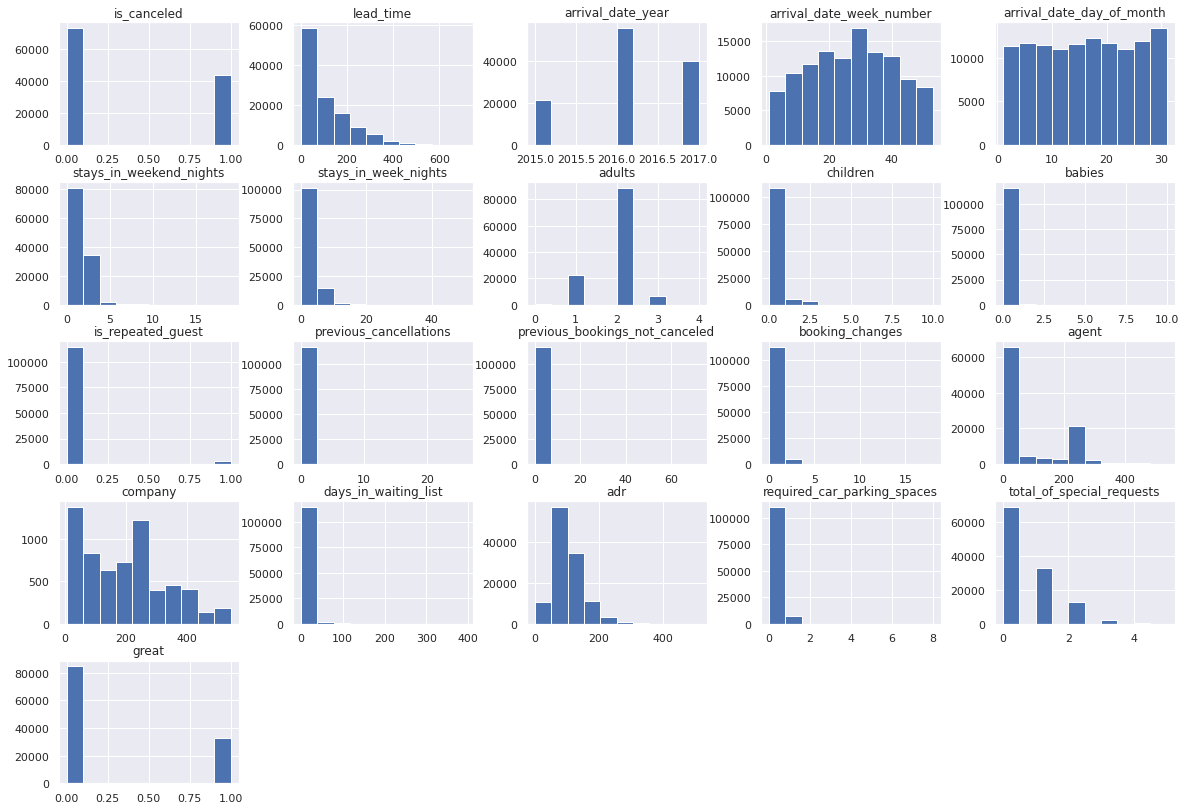

In [49]:
df.hist(figsize=(20,14))
plt.show()

### Boxplot

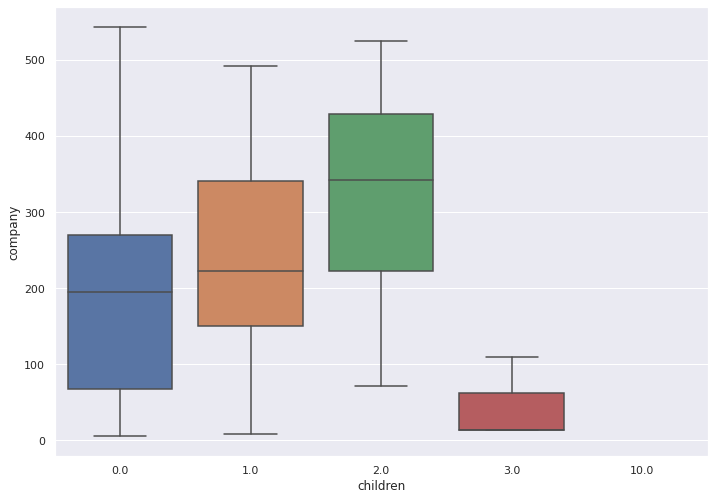

In [51]:
sns.boxplot(x='children',y='company',data=df)

### Stripplot

A strip plot is a graphical data analysis technique for summarizing a univariate dataset. The strip plot is an alternative to a histogrtam or a density plot. It is typically used for small data sets. 

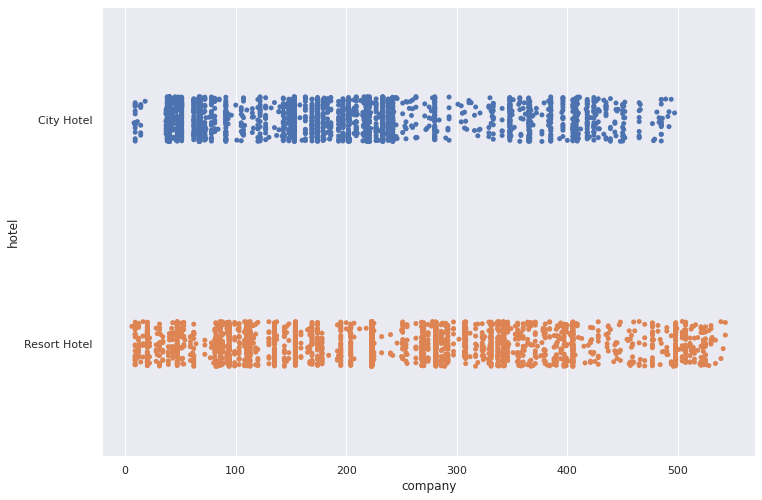

In [52]:
# this will help differeniate between a city hotel and a resort hotel 
sns.stripplot(x = 'company',y = 'hotel',data = df)

### Scatterplots

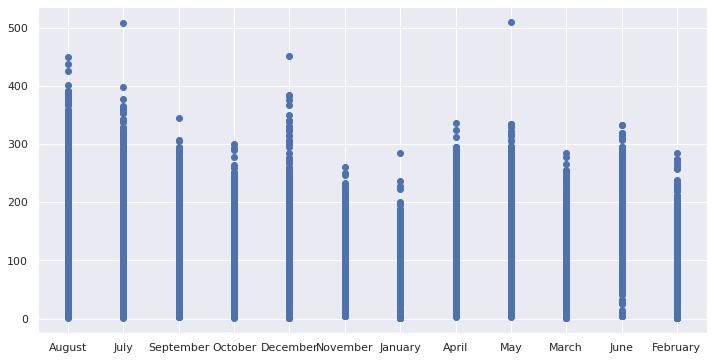

In [53]:
plt.figure(figsize=(12,6))
plt.scatter(df['arrival_date_month'],df['adr'])
plt.show()

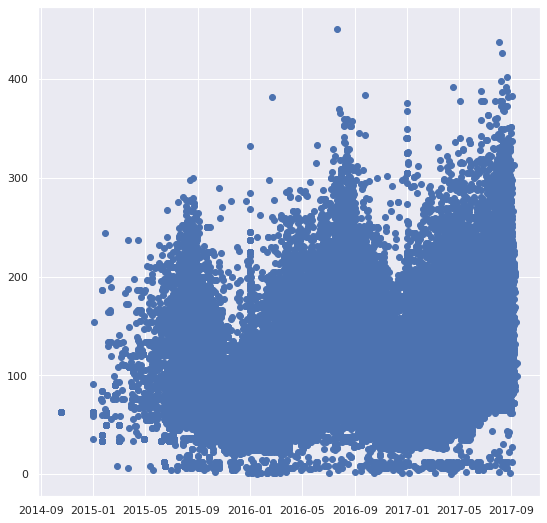

In [59]:
plt.figure(figsize=(9,9))
plt.scatter(df.index,df['adr'])
plt.show()

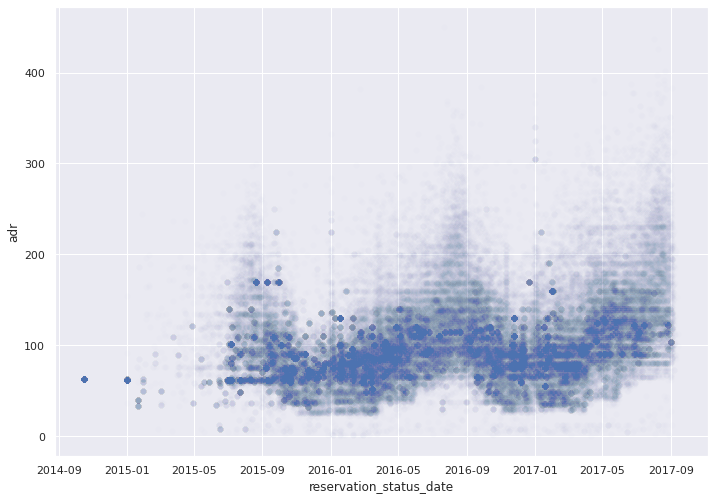

In [60]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data = df, x = df.index, y = df['adr'], alpha = .01)

### Jointplot
Seaborn's joinplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. Thos plot is a convience class that wraps JoinGrids. 

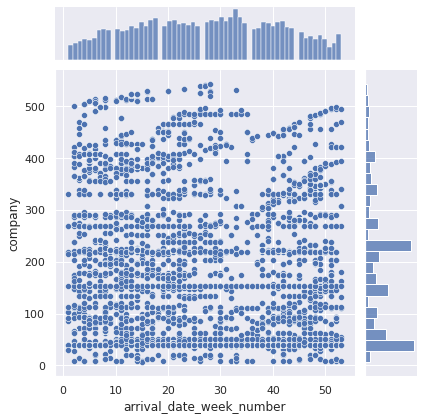

In [63]:
sns.jointplot(x = 'arrival_date_week_number', y = 'company',data = df)

### Relplot

This is a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. ... relplot() combines a FacetGrid with one of two axes-level functions: scatterplot() (with kind="scatter" ; the default)

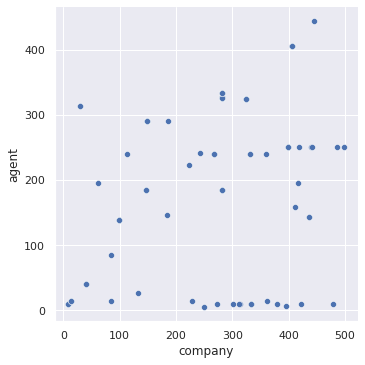

In [69]:
sns.relplot(data = df,x = 'company',y = 'agent')

### Line PLot

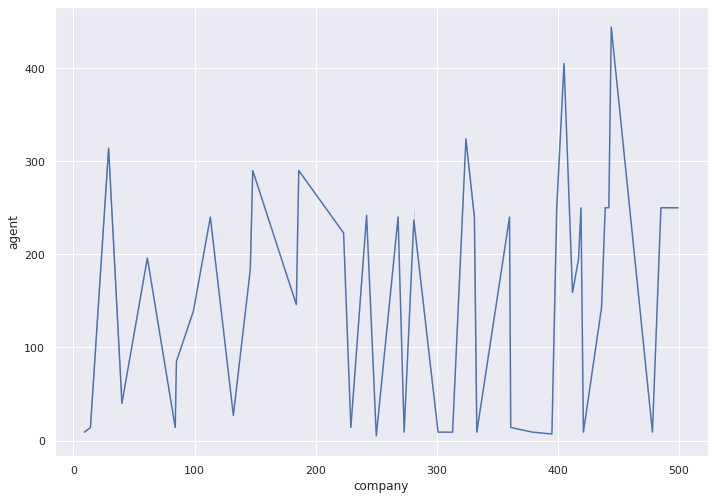

In [68]:
sns.lineplot(data = df, x = 'company',y = 'agent')

### Regplot

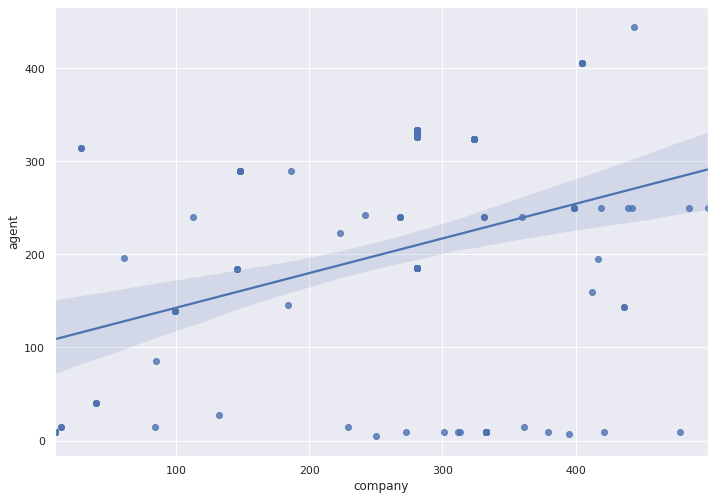

In [70]:
sns.regplot(data = df, x = 'company',y = 'agent')

### Catplot ( same as stripplot)

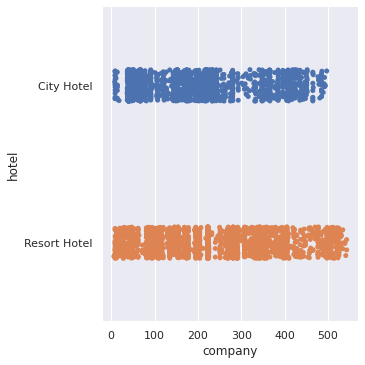

In [72]:
sns.catplot(x = 'company',y = 'hotel',data = df)

### KDE plot (density plot)

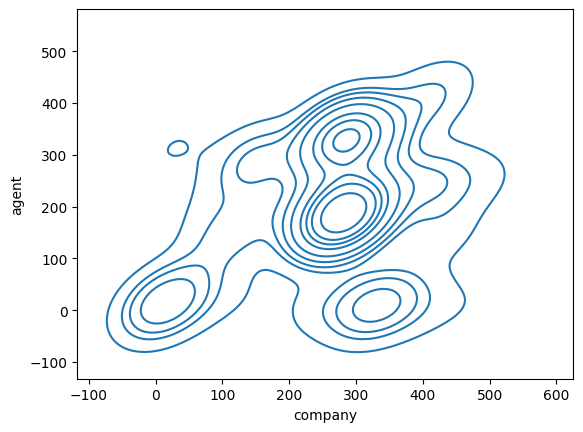

In [73]:
plt.style.use('default')
sns.kdeplot(data = df, x = 'company',y = 'agent')

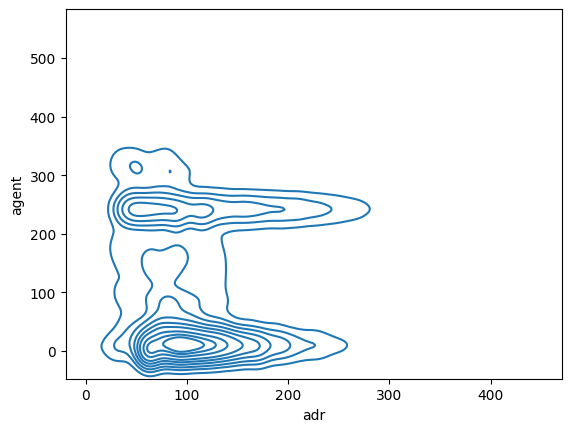

In [77]:
sns.kdeplot(data = df, x = 'adr',y = 'agent')

### Violin Plot

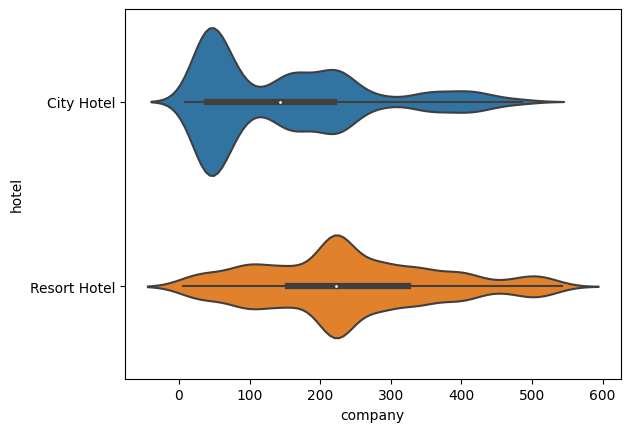

In [75]:
sns.violinplot(data = df, x = 'company',y = 'hotel')

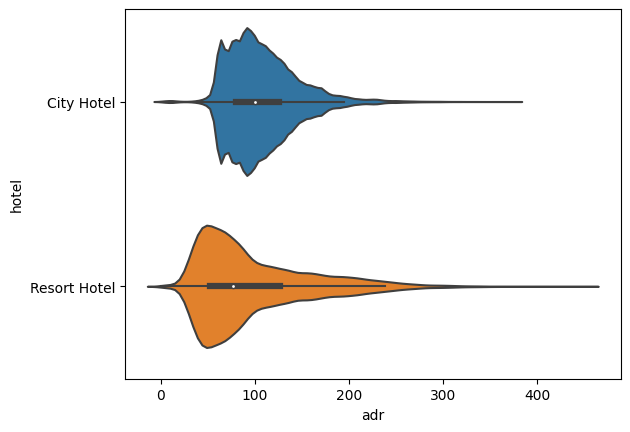

In [76]:
sns.violinplot(data = df, x = 'adr',y = 'hotel')

# Wrangle Function #2

In [162]:
def wrangle(filepath):

  df = pd.read_csv(filepath)
  df = df.drop(['country','agent','company'],axis=1)


  df = df.dropna()


  return df

data = wrangle(DATA_SET)

### Analysis

In [81]:
# df.isnull().sum()
# df['country'].value_counts()

In [82]:
# df['customer_type'].value_counts(normalize = True)


In [83]:
# df['customer_type'].nunique()

In [84]:
# df['customer_type'].unique()

In [85]:
# df.describe()

In [86]:
# df['reservation_status'].value_counts()

In [81]:
# df['adr'].mean()


In [82]:
# df['adr'].describe()

In [83]:
# # lets say anything below 90% is considered a good price
# df['great'] = (df['adr'] <= 95).astype(int)
# df['great']

In [87]:
# df.isnull().sum()

In [85]:
# df['distribution_channel'].value_counts().sum()

In [88]:
# df.dtypes == object

In [90]:
# df['adr'].mean()
# df['adr'].median()
# # df['adr'].mode()
# X_train['adr'].median()

# Split Data with "hotel" as target vector 

cant decide if the great or hotel is a better target vector 


In [180]:
print(data.shape)
data.head()


(119386, 29)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,0.0,0,0,3,1,0,0,0,2,2,3,0,0,2,0.0,0,0,1,121
1,1,0,737,2015,5,27,1,0,0,2,0.0,0,0,3,1,0,0,0,2,2,4,0,0,2,0.0,0,0,1,121
2,1,0,7,2015,5,27,1,0,1,1,0.0,0,0,3,1,0,0,0,0,2,0,0,0,2,75.0,0,0,1,122
3,1,0,13,2015,5,27,1,0,1,1,0.0,0,0,2,0,0,0,0,0,0,0,0,0,2,75.0,0,0,1,122
4,1,0,14,2015,5,27,1,0,2,2,0.0,0,0,6,3,0,0,0,0,0,0,0,0,2,98.0,0,1,1,123


In [181]:
y = data['hotel']
X = data.drop('hotel', axis = 1)

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = .2)

In [227]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

93937
23485
93937
23485


### Baseline

In [184]:
print('Baseline Accuracy',y_train.value_counts(normalize = True).max()) 

Baseline Accuracy 0.6641851991456214


# Models for hotel vector

### Logistic Regression

In [185]:
#lets find the categorialfeatures
list_1=list(data.columns)

In [186]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)

In [187]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [188]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])

In [178]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,0.0,0,0,3,1,0,0,0,2,2,3,0,0,2,0.0,0,0,1,121
1,1,0,737,2015,5,27,1,0,0,2,0.0,0,0,3,1,0,0,0,2,2,4,0,0,2,0.0,0,0,1,121
2,1,0,7,2015,5,27,1,0,1,1,0.0,0,0,3,1,0,0,0,0,2,0,0,0,2,75.0,0,0,1,122
3,1,0,13,2015,5,27,1,0,1,1,0.0,0,0,2,0,0,0,0,0,0,0,0,0,2,75.0,0,0,1,122
4,1,0,14,2015,5,27,1,0,2,2,0.0,0,0,6,3,0,0,0,0,0,0,0,0,2,98.0,0,1,1,123


In [156]:
# df['Month'] = pd.Datetime(df['arrival_date_month']).month
# df['Month']= pd.to_datetime(df['arrival_date_month'], errors = 'coerce')
# df.head()
# df.isin(['March']).any()

In [190]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [193]:


y_pred_reg = reg.predict(X_test)
acc_reg = accuracy_score(y_test, y_pred_reg)

print("Classification Report is:\n",classification_report(y_test,y_pred_reg))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_reg))
print("Training Score:\n",reg.score(X_train,y_train)*100)
print(f"Accuracy Score of Logistic Regression is : {acc_reg}")

Classification Report is:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83     15891
           1       0.70      0.45      0.55      7987

    accuracy                           0.75     23878
   macro avg       0.73      0.68      0.69     23878
weighted avg       0.74      0.75      0.73     23878

Confusion Matrix:
 [[14378  1513]
 [ 4407  3580]]
Training Score:
 75.49629350420906
Accuracy Score of Logistic Regression is : 0.7520730379428763


### Decision Tree Classifier


In [203]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [205]:
y_pred_reg=reg.predict(X_test)
acc_reg = accuracy_score(y_test, y_pred_reg)
print("Classification Report is:\n",classification_report(y_test,y_pred_reg))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_reg))
print("Training Score:\n",reg.score(X_train,y_train)*100)
print(f"Accuracy Score of Logistic Regression is : {acc_reg}")

Classification Report is:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83     15891
           1       0.70      0.45      0.55      7987

    accuracy                           0.75     23878
   macro avg       0.73      0.68      0.69     23878
weighted avg       0.74      0.75      0.73     23878

Confusion Matrix:
 [[14378  1513]
 [ 4407  3580]]
Training Score:
 75.49629350420906
Accuracy Score of Logistic Regression is : 0.7520730379428763


### Decision Tree Classifier

In [207]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [209]:
y_pred=dtree.predict(X_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score

[[14919   972]
 [ 2448  5539]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     15891
           1       0.85      0.69      0.76      7987

    accuracy                           0.86     23878
   macro avg       0.85      0.82      0.83     23878
weighted avg       0.86      0.86      0.85     23878



0.8567719239467292

### Random Forest Classifier

In [211]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [212]:
y_pred=rfc.predict(X_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score

[[15570   321]
 [  505  7482]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     15891
           1       0.96      0.94      0.95      7987

    accuracy                           0.97     23878
   macro avg       0.96      0.96      0.96     23878
weighted avg       0.97      0.97      0.97     23878



0.965407488064327

### XGB Classifier

In [214]:
from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(X_train, y_train)

[01:15:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [215]:
y_pred=xgb.predict(X_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score

[[15421   470]
 [ 3909  4078]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     15891
           1       0.90      0.51      0.65      7987

    accuracy                           0.82     23878
   macro avg       0.85      0.74      0.76     23878
weighted avg       0.83      0.82      0.80     23878



0.8166094312756512

## Communicate Results

We can see here that the Random Forest Classifier has a accuracy score of 97%. We will use the Random Forest Classifier for our predictive model. 

### 

In [239]:
model_lr = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(strategy='mean'),
    LogisticRegression()
)

model_lr_test.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [240]:
model_rf = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier()
)

model_lr_test.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [233]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,0.0,0,0,3,1,0,0,0,2,2,3,0,0,2,0.0,0,0,1,121
1,1,0,737,2015,5,27,1,0,0,2,0.0,0,0,3,1,0,0,0,2,2,4,0,0,2,0.0,0,0,1,121
2,1,0,7,2015,5,27,1,0,1,1,0.0,0,0,3,1,0,0,0,0,2,0,0,0,2,75.0,0,0,1,122
3,1,0,13,2015,5,27,1,0,1,1,0.0,0,0,2,0,0,0,0,0,0,0,0,0,2,75.0,0,0,1,122
4,1,0,14,2015,5,27,1,0,2,2,0.0,0,0,6,3,0,0,0,0,0,0,0,0,2,98.0,0,1,1,123


In [236]:
# new column for predictive model here
Xnew = [[1,	138,	2017,	1,	2,	1,	3,	3,	0.0,	0	,0,	0,	0,	0,	0,	164.05,	0,	3,	'Canceled']]
Xnew;

new_line = [[1,0,286,2016,5,31,13,0,2,2,0.0,0,0,3,1,0,0,0,0,9,10,11,12,13,14,15,16,17]]

In [237]:
# print("This represents the probabilty that a customer will pay for a room at this location",
#       model_rf.predict_proba(new_line)[0])
# model_rf.predict_proba(new_line)


NotFittedError: ignored

In [243]:
model_lr = make_pipeline(
    OneHotEncoder(handle_unknown='ignore',sparse = True),
    SimpleImputer(),
    LogisticRegression()
)

model_lr.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [244]:
model_rf =  make_pipeline(

    OneHotEncoder(handle_unknown='ignore'),
    # SimpleImputer(strategy = 'constant'),
    
    RandomForestClassifier()
)

# ,handle_unknown = 'ignore'  sparse = True
model_rf.fit(X_train, y_train);


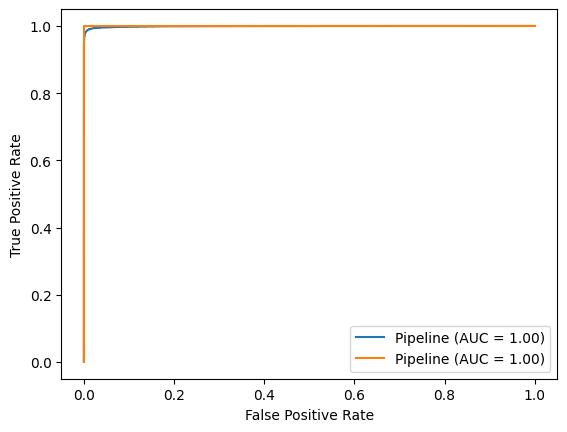

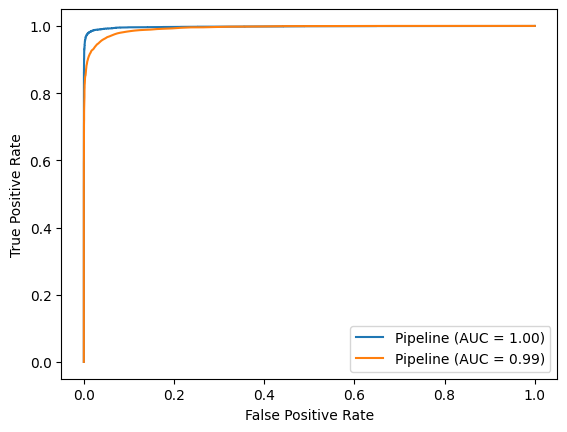

In [246]:

lr = plot_roc_curve(model_lr, X_train, y_train)

rf = plot_roc_curve(model_rf,
                   X_train,
                   y_train,
                   ax=lr.ax_)

lr = plot_roc_curve(model_lr, X_test, y_test)

rf = plot_roc_curve(model_rf,
                   X_test,
                   y_test,
                   ax=lr.ax_)

# ----------------------------------------------------------------

# Split Data with "great" as target vector

In [217]:
target = 'great'
y = df[target]
X = df.drop(target, axis = 1)

 # df['great'] = (df['adr'] <= 92).astype(int)

In [218]:
# what do I want my mask to be??
# find the date range in the index val 
# date ranges from 2014 -2017

train_mask = X.index.year < 2016

# Training before 2016
X_train, y_train = X.loc[train_mask], y.loc[train_mask]

# Training during 2016
validation_mask = X.index.year == 2016
X_val, y_val = X.loc[validation_mask], y.loc[validation_mask]

# Test after 2016
test_mask = X.index.year >2016
X_test, y_test = X.loc[test_mask], y.loc[test_mask]

In [219]:
y_train.mean()

0.4604249072299474

In [220]:
baseline_accuracy = y_train.value_counts(normalize=True).max()*100

print('Baseline Accuracy is', baseline_accuracy)

Baseline Accuracy is 53.95750927700526


In [221]:
y.shape
y_pred_baseline = [y.mean()]*y.shape[0]

In [222]:
# from sklearn.linear_model import LinearRegression
# model_lr = LinearRegression()
# model_lr.fit(X, y)
# # here
# y_pred = model_lr.predict(X)
# model_lr.coef_

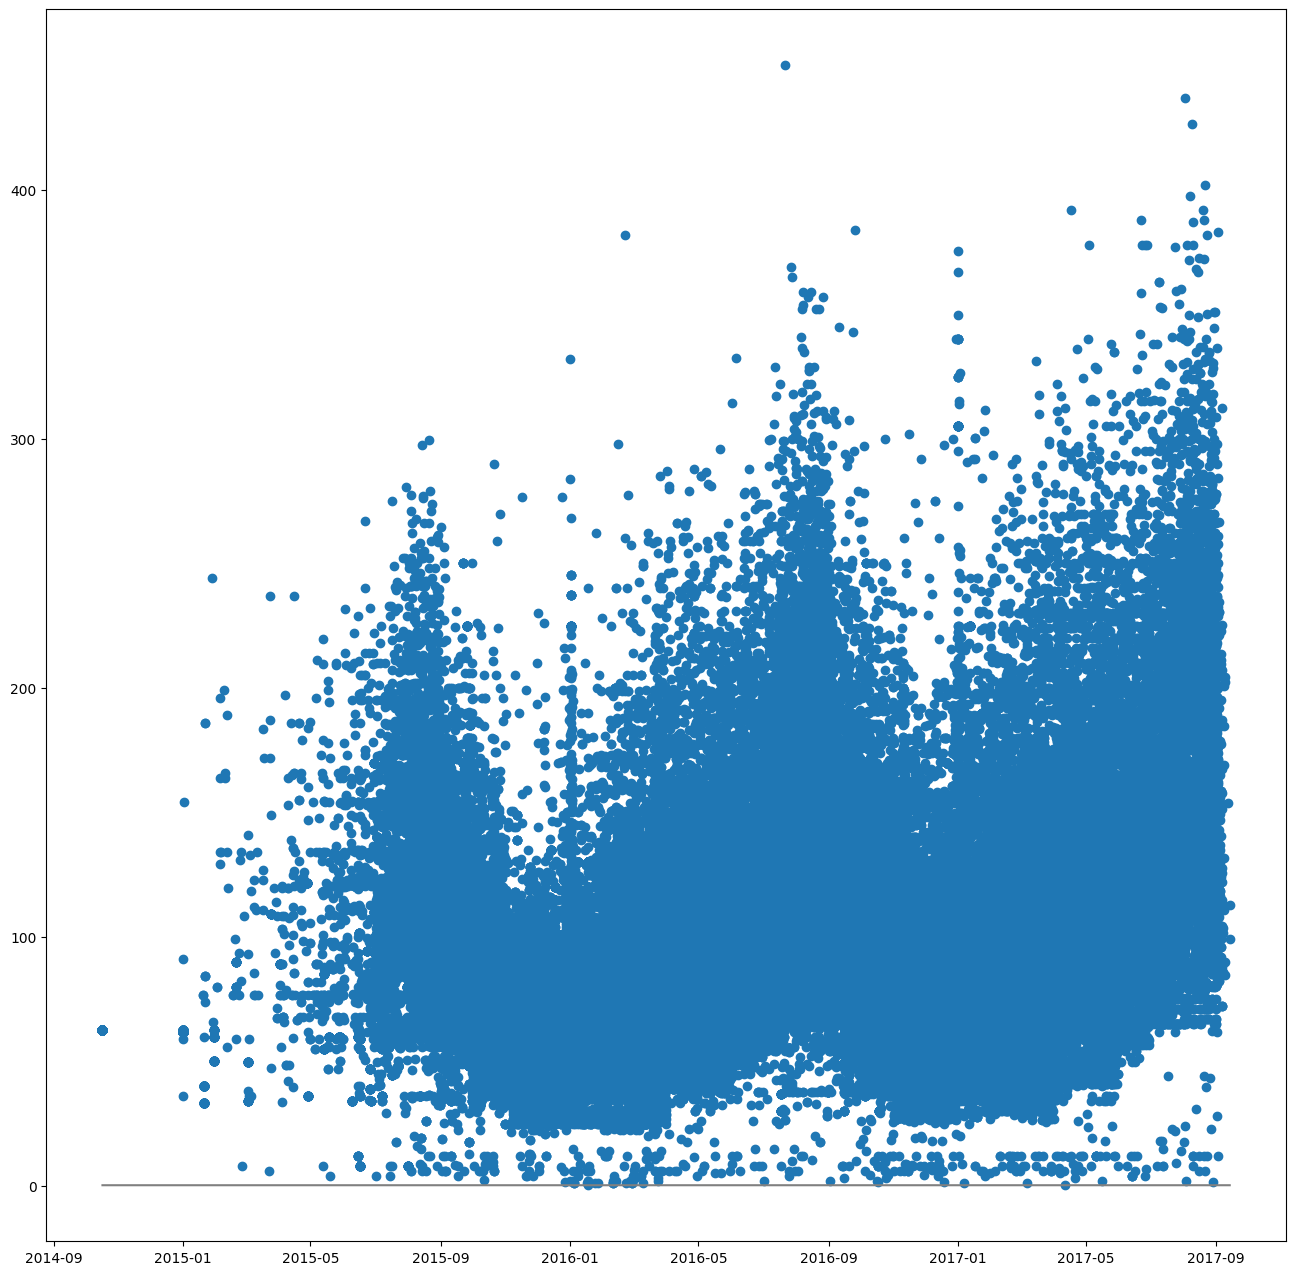

In [223]:
plt.figure(figsize=(16,16))
plt.scatter(df.index,df['adr'])
# plt.plot(df.index, df['adr'].mean(),color = 'red')
plt.plot(df.index, y_pred_baseline, color = 'grey', label = 'Baseline Model')
# plt.line(df.index, slope, color = 'red', label = "Linear Line")

In [224]:
from scipy import stats
# slope, intercept, r_value, p_value, std_err = stats.linregress(df.index, df['adr'])

from sklearn import linear_model
reg = linear_model.LinearRegression()

slope = df['adr'].mean()
slope
# need to find intercept 



103.47835993254562

In [225]:
X_test

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
reservation_status_date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0,1,138,2017,1,2,1,3,3,0.0,0,2,6,3,0,0,0,3,3,0,0,0,2,164.05,0,3,0
2017-01-01,0,1,130,2017,19,11,1,3,2,0.0,0,0,6,3,0,0,0,0,0,0,0,0,2,135.00,0,0,0
2017-01-01,0,1,121,2017,17,28,1,2,2,0.0,0,2,6,3,0,0,0,3,3,0,0,0,2,166.50,0,0,0
2017-01-01,0,1,106,2017,15,13,0,2,2,0.0,0,3,6,3,0,0,0,0,0,0,0,0,2,108.00,0,0,0
2017-01-01,0,1,106,2017,15,13,0,2,2,0.0,0,3,6,3,0,0,0,0,0,0,0,0,2,108.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-10,1,0,169,2017,35,30,2,9,2,0.0,0,0,3,1,0,0,0,4,4,0,0,0,3,204.27,0,1,1
2017-09-10,1,0,269,2017,34,24,4,13,2,0.0,0,0,5,3,0,0,0,3,3,0,0,0,0,84.80,0,2,1
2017-09-12,1,0,204,2017,35,29,4,10,2,0.0,0,0,3,1,0,0,0,4,4,0,0,0,2,153.57,0,3,1


# Establish Basline with "great" target vector

In [100]:
print('Baseline Accuracy',y_train.value_counts(normalize = True).max()) 

Baseline Accuracy 0.5410790423089538


In [101]:
y_train.mean()

0.45892095769104624

In [102]:
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,great
reservation_status_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-10-17,1,300,2015,August,33,13,0,2,2,0.0,0,BB,PRT,Groups,1,1,0,A,A,0,No Deposit,0,Transient-Party,62.8,0,0,Canceled,1
2014-10-17,1,286,2015,July,31,30,0,2,2,0.0,0,BB,PRT,Groups,1,1,0,A,A,0,No Deposit,0,Transient-Party,62.8,0,0,Canceled,1
2014-10-17,1,286,2015,July,31,30,0,2,2,0.0,0,BB,PRT,Groups,1,1,0,A,A,0,No Deposit,0,Transient-Party,62.8,0,0,Canceled,1
2014-10-17,1,286,2015,July,31,30,0,2,2,0.0,0,BB,PRT,Groups,1,1,0,A,A,0,No Deposit,0,Transient-Party,62.8,0,0,Canceled,1
2014-10-17,1,286,2015,July,31,30,0,2,2,0.0,0,BB,PRT,Groups,1,1,0,A,A,0,No Deposit,0,Transient-Party,62.8,0,0,Canceled,1


# Build Model

In [103]:
# we need to do some ohe
# with building my model, I want to focus on a lot of tuning, hyperparameters, and howo to upload the file into github. 
# different ways tp build models
#   -Logistic Regression
#   -

### Logistic Regression

In [130]:
# dont forget about the ADR column
# logistic regression most likel does not work 

model_lr_test = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(strategy='mean'),
    LogisticRegression()
)

model_lr_test.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [195]:
y_pred_reg=reg.predict(X_test)
acc_reg = accuracy_score(y_test, y_pred_reg)
print("Classification Report is:\n",classification_report(y_test,y_pred_reg))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_reg))
print("Training Score:\n",reg.score(X_train,y_train)*100)
print(f"Accuracy Score of Logistic Regression is : {acc_reg}")

Classification Report is:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83     15891
           1       0.70      0.45      0.55      7987

    accuracy                           0.75     23878
   macro avg       0.73      0.68      0.69     23878
weighted avg       0.74      0.75      0.73     23878

Confusion Matrix:
 [[14378  1513]
 [ 4407  3580]]
Training Score:
 75.49629350420906
Accuracy Score of Logistic Regression is : 0.7520730379428763


### Decision Tree Classifier

In [106]:
# model_dt = make_pipeline(
#     OrdinalEncoder(),
#     SimpleImputer(),
#     DecisionTreeClassifier()
# )

# cv_scores_dt = cross_val_score(model_dt, X_train, y_train, cv=10, n_jobs=-1)

### Everything Else

In [107]:
ohe = OneHotEncoder()
imp = SimpleImputer()
clf = LogisticRegression()

In [108]:
ct = make_column_transformer(
    (ohe, ['arrival_date_month','meal','country','market_segment',
    'distribution_channel','reserved_room_type','deposit_type','customer_type',
    'reservation_status']),
    


    
)

In [109]:
pipe = make_pipeline(
    ct,
    clf
)

In [110]:
df.isnull().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
great                       

In [111]:
# pipe.fit(X_train, y_train)
# df.head()

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116958 entries, 2014-10-17 to 2017-09-14
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     116958 non-null  int64  
 1   lead_time                       116958 non-null  int64  
 2   arrival_date_year               116958 non-null  int64  
 3   arrival_date_month              116958 non-null  object 
 4   arrival_date_week_number        116958 non-null  int64  
 5   arrival_date_day_of_month       116958 non-null  int64  
 6   stays_in_weekend_nights         116958 non-null  int64  
 7   stays_in_week_nights            116958 non-null  int64  
 8   adults                          116958 non-null  int64  
 9   children                        116958 non-null  float64
 10  babies                          116958 non-null  int64  
 11  meal                            116958 non-null  object 
 12  

In [113]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24392 entries, 2014-10-17 to 2015-12-31
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     24392 non-null  int64  
 1   lead_time                       24392 non-null  int64  
 2   arrival_date_year               24392 non-null  int64  
 3   arrival_date_month              24392 non-null  object 
 4   arrival_date_week_number        24392 non-null  int64  
 5   arrival_date_day_of_month       24392 non-null  int64  
 6   stays_in_weekend_nights         24392 non-null  int64  
 7   stays_in_week_nights            24392 non-null  int64  
 8   adults                          24392 non-null  int64  
 9   children                        24392 non-null  float64
 10  babies                          24392 non-null  int64  
 11  meal                            24392 non-null  object 
 12  country        

In [114]:
y_train.value_counts(normalize = True)

0    0.541079
1    0.458921
Name: great, dtype: float64

In [115]:
# model_lr = make_pipeline(
#     OneHotEncoder()
# )

# model_lr.fit(X_train, y_train)
print(y_train.shape)
print(X_train.shape)

(24392,)
(24392, 27)


In [116]:
# y_train.isnull().sum()
# df.head()
# # df['reserved_room_type'].value_counts()
# df.info()
# df.isnull().sum()
# df.dropna()

### Random Forest

In [117]:
model_rf =  make_pipeline(

    OneHotEncoder(handle_unknown='ignore'),
    # SimpleImputer(strategy = 'constant'),
    
    RandomForestClassifier()
)

# ,handle_unknown = 'ignore'  sparse = True
model_rf.fit(X_train, y_train);

In [118]:
model_rf.predict([X_test.iloc[0]])

array([0])

### Logistic Regression

In [119]:
model_lr = make_pipeline(
    OneHotEncoder(handle_unknown='ignore',sparse = True),
    SimpleImputer(),
    LogisticRegression()
)

model_lr.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [120]:
print(df.shape)
df.head()

(116958, 28)


,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,great
reservation_status_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-10-17,1,300,2015,August,33,13,0,2,2,0.0,0,BB,PRT,Groups,1,1,0,A,A,0,No Deposit,0,Transient-Party,62.8,0,0,Canceled,1
2014-10-17,1,286,2015,July,31,30,0,2,2,0.0,0,BB,PRT,Groups,1,1,0,A,A,0,No Deposit,0,Transient-Party,62.8,0,0,Canceled,1
2014-10-17,1,286,2015,July,31,30,0,2,2,0.0,0,BB,PRT,Groups,1,1,0,A,A,0,No Deposit,0,Transient-Party,62.8,0,0,Canceled,1
2014-10-17,1,286,2015,July,31,30,0,2,2,0.0,0,BB,PRT,Groups,1,1,0,A,A,0,No Deposit,0,Transient-Party,62.8,0,0,Canceled,1
2014-10-17,1,286,2015,July,31,30,0,2,2,0.0,0,BB,PRT,Groups,1,1,0,A,A,0,No Deposit,0,Transient-Party,62.8,0,0,Canceled,1


In [121]:
# new column for predictive model here
Xnew = [[1,	138,	2017,	1,	2,	1,	3,	3,	0.0,	0	,0,	0,	0,	0,	0,	164.05,	0,	3,	'Canceled']]
Xnew;
new_line = [[1,286,2016,'August',31,13,1,2,2,0,0,'BB','PRT','Groups',1,0,0,'A','A',0,'Deposit',0,'Transient-Party',0,0,'Canceled',1]]

In [122]:
model_rf.predict(new_line)

array([1])

In [123]:
print("This represents the probabilty that a customer will pay for a room at this location",
      model_rf.predict_proba(new_line)[0])
model_rf.predict_proba(new_line)


This represents the probabilty that a customer will pay for a room at this location [0.38 0.62]


array([[0.38, 0.62]])

In [124]:
X_test.iloc[0]

is_canceled                                1
lead_time                                138
arrival_date_year                       2017
arrival_date_month                   January
arrival_date_week_number                   1
arrival_date_day_of_month                  2
stays_in_weekend_nights                    1
stays_in_week_nights                       3
adults                                     3
children                                   0
babies                                     0
meal                                      HB
country                                  ITA
market_segment                     Online TA
is_repeated_guest                          0
previous_cancellations                     0
previous_bookings_not_canceled             0
reserved_room_type                         D
assigned_room_type                         D
booking_changes                            0
deposit_type                      No Deposit
days_in_waiting_list                       0
customer_t

In [125]:
X_test.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
reservation_status_date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1,138,2017,January,1,2,1,3,3,0.0,0,HB,ITA,Online TA,0,0,0,D,D,0,No Deposit,0,Transient,164.05,0,3,Canceled
2017-01-01,1,130,2017,May,19,11,1,3,2,0.0,0,BB,AUT,Online TA,0,0,0,A,A,0,No Deposit,0,Transient,135.00,0,0,Canceled
2017-01-01,1,121,2017,April,17,28,1,2,2,0.0,0,HB,HUN,Online TA,0,0,0,D,D,0,No Deposit,0,Transient,166.50,0,0,Canceled
2017-01-01,1,106,2017,April,15,13,0,2,2,0.0,0,SC,ESP,Online TA,0,0,0,A,A,0,No Deposit,0,Transient,108.00,0,0,Canceled
2017-01-01,1,106,2017,April,15,13,0,2,2,0.0,0,SC,ESP,Online TA,0,0,0,A,A,0,No Deposit,0,Transient,108.00,0,0,Canceled


# Check for Leakage

# ROC Curve 

In [216]:
lr = plot_roc_curve(model_lr, X_test, y_test)

rf = plot_roc_curve(model_rf,
                   X_test,
                   y_test,
                   ax=lr.ax_)

lr = plot_roc_curve(model_lr, X_val, y_val)

rf = plot_roc_curve(model_rf,
                   X_val,
                   y_val,
                   ax=lr.ax_)

NameError: ignored

In [ ]:
# Get predicted probabilities from model
y_pred_prob = model_rf.predict_proba(X_val)[:, -1]


# Input true labels and probability predictions
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

# Put data into dictionary
data = {'false_pos_rate': fpr,
        'true_pos_rate': tpr,
        'thresholds': thresholds}

pd.DataFrame(data)

In [ ]:
print('Logistic Regression')
print(classification_report(y_val, model_lr.predict(X_val)))

plot_confusion_matrix(model_lr, X_val, y_val);

In [ ]:
print('Random Forest')
print(classification_report(y_val, model_rf.predict(X_val))) # VALIDATION DATA
plot_confusion_matrix(model_rf, X_val, y_val);

# Tuning / Communication

In [ ]:
importances = model_rf.named_steps['randomforestclassifier'].feature_importances_
feature_names = X_train.columns
feature_names

feat_imp = pd.Series(data=importances, index=feature_names).sort_values()

# feat_imp.tail(10).plot(kind='barh');

In [ ]:
print(importances.shape)
print(feature_names.shape)

In [ ]:
# importances = model_xgb.named_steps['xgbclassifier'].feature_importances_
# feature_names = X_train.columns

# feat_imp = pd.Series(data=importances, index=feature_names).sort_values()

# feat_imp.tail(10).plot(kind='barh');

In [ ]:
col = 'quantity'

model_w_col = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=25, random_state=42, n_jobs=-1)
)

model_w_col.fit(X_train, y_train)

print('Training Accuracy with column included:', model_w_col.score(X_val, y_val))

In [ ]:
perm_imp = permutation_importance(model_xgb, 
                                  X_val, 
                                  y_val, 
                                  n_repeats=5, 
                                  n_jobs=-1, 
                                  random_state=42)

In [ ]:
data = {'imp_mean': perm_imp['importances_mean'],
        'imp_std': perm_imp['importances_std']}

importances = pd.DataFrame(data, index=X_val.columns).sort_values(by='imp_mean')

importances.head()

In [ ]:
importances['imp_mean'].tail(10).plot(kind='barh')

### Permutation Importance 

In [ ]:
# do it again and randomize the column of interest
# Step 1: Choose a Feature
col = 'arrival_date_month'

# Step 2: Train the model with all features
model_w_col = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=25, random_state=42, n_jobs=-1)
)

model_w_col.fit(X_train, y_train);

In [ ]:
# Step 3: Evaluate the Model using VALIDATION DATA'

print('XGBoost Validation Accuracy', model_xgb.score(X_val, y_val))

In [ ]:
# Step 4: In our VALIDATION data, permute the feature we're evaluating
X_val_perm = X_val.copy()
X_val_perm[col] = np.random.permutation(X_val_perm[col])

In [ ]:
# pandas approach to permutation
df['arrival_date_month'] = df['arrival_date_month'].sample(1)

In [ ]:
#Step 5: Calculate our error metric with the permuted data
print('XGBoost Validation Accuracy with "quantity" permuted', model_xgb.score(X_val_perm, y_val))

In [ ]:
0.8160753706826123-0.761181317248692